# Chapter 15 - Stationarity in Time Series Data

Time series is different from more traditional classication and regression predictive modeling problems. The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specically. For example, when modeling, **there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary**. These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures.

After completing this tutorial, you will know:

- How to identify obvious stationary and non-stationary time series using line plot.
- How to spot-check summary statistics like mean and variance for a change over time.
- **How to use statistical tests with statistical signicance to check if a time series is stationary**.

## 15.1 Stationary Time Series

The observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects.

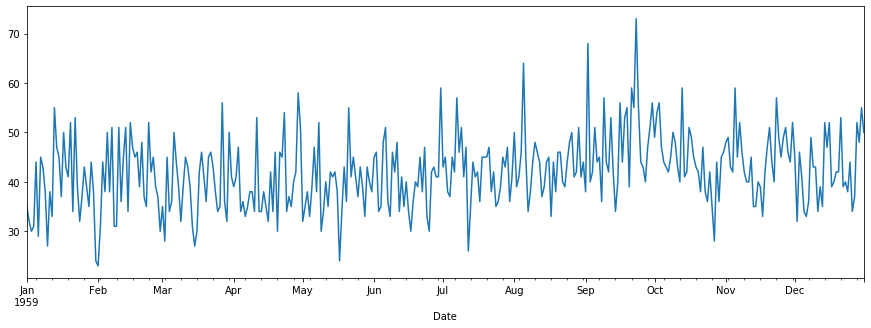

In [30]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

csvfile = '.\\code\\chapter_15\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

rcParams['figure.figsize'] = 15, 5
series.plot()
pyplot.show()

## 15.2 Non-Stationary Time Series

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index. Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

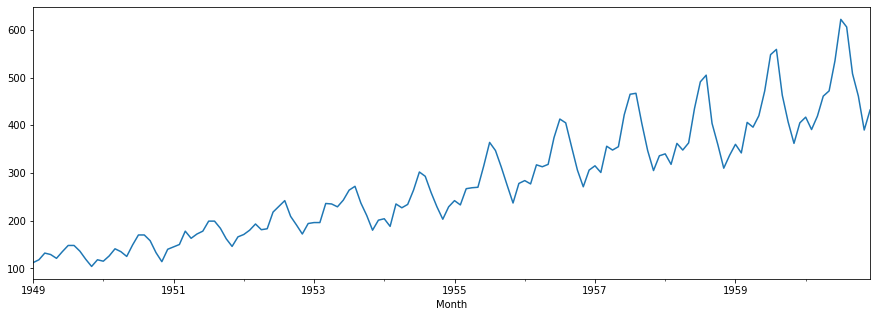

In [31]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

csvfile = '.\\code\\chapter_15\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

rcParams['figure.figsize'] = 15, 5
series.plot()
pyplot.show()

## 15.3 Types of Stationary Time Series

The notion of stationarity comes from the theoretical study of time series and it is a useful abstraction when forecasting. There are some ner-grained notions of stationarity that you may come across if you dive deeper into this topic. They are:
- **Stationary Process**: A `process that generates a stationary series` of observations.
- **Stationary Model**: A `model that describes a stationary series` of observations.
- **Trend Stationary**: A time series that `does not exhibit a trend`.
- **Seasonal Stationary**: A time series that `does not exhibit seasonality`.
- **Strictly Stationary**: A `mathematical denition of a stationary process`, specically that the joint distribution of observations is invariant to time shift.

## 15.4 Stationary Time Series and Forecasting

Should you make your time series stationary? Generally, yes. If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

We turn to machine learning methods when the classical methods fail. When we want more or better results. We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when working with non-stationary observations or some mixture of stationary and non-stationary views of the problem.

## 15.5 Checks for Stationarity

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.
- **Look at Plots**: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
- **Summary Statistics**: You can review the summary statistics for your data for seasons or random partitions and check for obvious or signicant dierences.
- **Statistical Tests**: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

## 15.6 Summary Statistics

A quick and dirty check to see if your time series is non-stationary is to review summary statistics. You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the dierence is statistically signicant, the time series is likely non-stationary.

### 15.6.1 Daily Births Dataset

Because we are looking at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution.

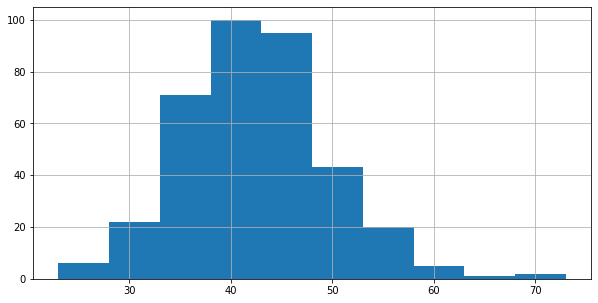

In [32]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot

csvfile = '.\\code\\chapter_15\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

rcParams['figure.figsize'] = 10, 5
series.hist()
pyplot.show()

Next, we can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values.

In [33]:
# calculate statistics of partitioned time series data
from pandas import read_csv

csvfile = '.\\code\\chapter_15\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values

split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


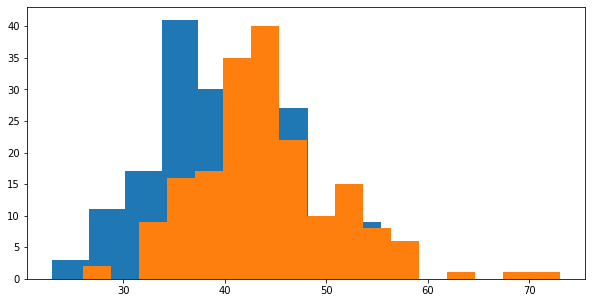

In [34]:
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 10, 5
plt.hist(X1, bins='auto')
plt.hist(X2, bins='auto')
pyplot.show()

Running this example shows that the mean and variance values are dierent, but in the same ball-park.

### 15.6.2 Airline Passengers Dataset

Cutting straight to the chase, we can split our dataset and calculate the mean and variance for each group.

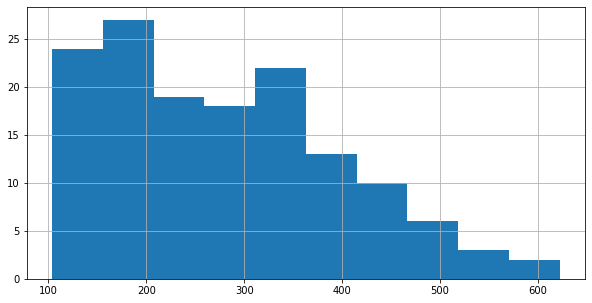

In [35]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot

csvfile = '.\\code\\chapter_15\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

rcParams['figure.figsize'] = 10, 5
series.hist()
pyplot.show()

In [36]:
# calculate statistics of partitioned time series data
from pandas import read_csv

csvfile = '.\\code\\chapter_15\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values

split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


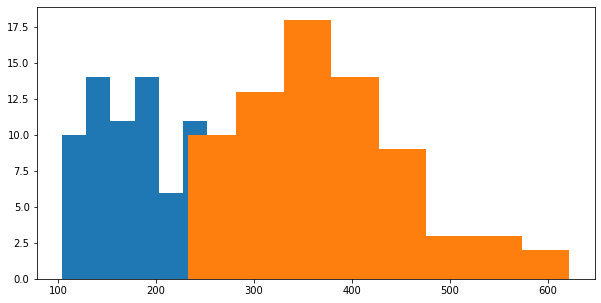

In [37]:
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 10, 5
plt.hist(X1, bins='auto')
plt.hist(X2, bins='auto')
pyplot.show()

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing. This may suggest an exponential growth from season to season. A log transform can be used to 
atten out exponential change back to a linear relationship.

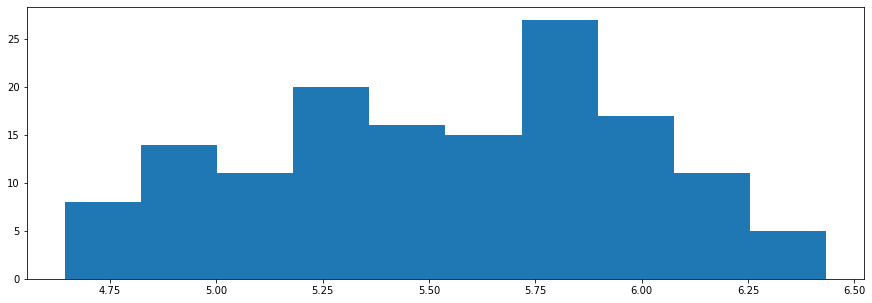

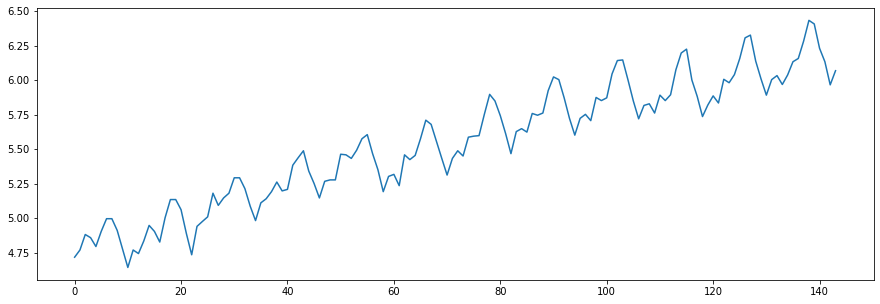

In [38]:
# histogram and line plot of log transformed time series
from pandas import read_csv
from matplotlib import pyplot
from numpy import log

csvfile = '.\\code\\chapter_15\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
# values of the log transformed
X = log(X)

rcParams['figure.figsize'] = 15, 5
pyplot.hist(X)
pyplot.show()

rcParams['figure.figsize'] = 15, 5
pyplot.plot(X)
pyplot.show()

In [39]:
# calculate statistics of partitioned log transformed time series data
from pandas import read_csv
from numpy import log

csvfile = '.\\code\\chapter_15\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
X = log(X)

split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


We can now calculate the mean and standard deviation of the values of the log transformed dataset.
Running the examples shows mean and standard deviation values for each group that are again similar, but not identical. Perhaps, **from these numbers alone, we would say the time series is stationary, but we strongly believe this to not be the case from reviewing the line plot**.

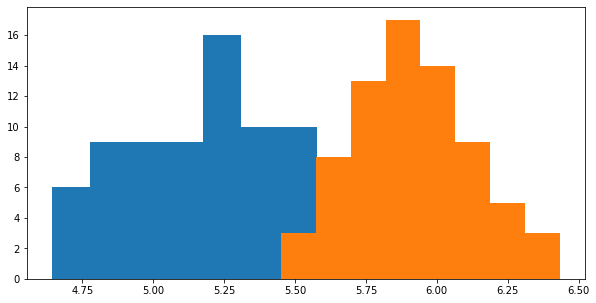

In [40]:
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 10, 5
plt.hist(X1, bins='auto')
plt.hist(X2, bins='auto')
pyplot.show()

we will use a statistical test designed to explicitly comment on whether a **univariate time series is stationary**.

## 15.7 Augmented Dickey-Fuller test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test1. The intuition behind a unit root test is that it determines **how strongly a time series is defined by a trend**.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure).

### 15.7.1 Daily Births Dataset

In [41]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

csvfile = '.\\code\\chapter_15\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a signicance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

### 15.7.2 Airline Passengers Dataset

In [42]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

csvfile = '.\\code\\chapter_15\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Running the example gives a different picture than the above. The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary). Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

Let's log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [43]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log

csvfile = '.\\code\\chapter_15\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
X = log(X)
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Running the example shows a negative value for the test statistic. We can see that the value is larger than the critical values, again, meaning that we fail to reject the null hypothesis and in turn that the time series is non-stationary.